In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
enroll_data=pd.read_csv(r'D:\Machine learning for data analysis\EDA Dataset\Indian school statstics\gross-enrollment-ratio-2013-2016.csv')
cols=enroll_data.columns
print(cols)
enroll_data.info()

Index(['State_UT', 'Year', 'Primary_Boys', 'Primary_Girls', 'Primary_Total',
       'Upper_Primary_Boys', 'Upper_Primary_Girls', 'Upper_Primary_Total',
       'Secondary_Boys', 'Secondary_Girls', 'Secondary_Total',
       'Higher_Secondary_Boys', 'Higher_Secondary_Girls',
       'Higher_Secondary_Total'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_UT                110 non-null    object 
 1   Year                    110 non-null    object 
 2   Primary_Boys            110 non-null    float64
 3   Primary_Girls           110 non-null    float64
 4   Primary_Total           110 non-null    float64
 5   Upper_Primary_Boys      110 non-null    float64
 6   Upper_Primary_Girls     110 non-null    float64
 7   Upper_Primary_Total     110 non-null    float64
 8   Secondary_Boys          110 non

In [4]:
enroll_data.drop(enroll_data[(enroll_data['Higher_Secondary_Boys']=='NR') | (enroll_data['Higher_Secondary_Boys']=='@')].index,inplace=True)
enroll_data.drop(enroll_data[(enroll_data['Higher_Secondary_Girls']=='NR') | (enroll_data['Higher_Secondary_Girls']=='@')].index,inplace=True)
enroll_data.drop(enroll_data[(enroll_data['Higher_Secondary_Total']=='NR') | (enroll_data['Higher_Secondary_Total']=='@')].index,inplace=True)
enroll_data['State_UT']=np.where(enroll_data['State_UT']=='Puducherry','Pondicherry',enroll_data['State_UT'])
enroll_data['State_UT']=np.where(enroll_data['State_UT']=='MADHYA PRADESH','Madhya Pradesh',enroll_data['State_UT'])
enroll_data['Higher_Secondary_Boys']=enroll_data['Higher_Secondary_Boys'].astype('float')
enroll_data['Higher_Secondary_Girls']=enroll_data['Higher_Secondary_Girls'].astype('float')
enroll_data['Higher_Secondary_Total']=enroll_data['Higher_Secondary_Total'].astype('float')
enroll_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 109
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State_UT                108 non-null    object 
 1   Year                    108 non-null    object 
 2   Primary_Boys            108 non-null    float64
 3   Primary_Girls           108 non-null    float64
 4   Primary_Total           108 non-null    float64
 5   Upper_Primary_Boys      108 non-null    float64
 6   Upper_Primary_Girls     108 non-null    float64
 7   Upper_Primary_Total     108 non-null    float64
 8   Secondary_Boys          108 non-null    float64
 9   Secondary_Girls         108 non-null    float64
 10  Secondary_Total         108 non-null    float64
 11  Higher_Secondary_Boys   108 non-null    float64
 12  Higher_Secondary_Girls  108 non-null    float64
 13  Higher_Secondary_Total  108 non-null    float64
dtypes: float64(12), object(2)
memory usage: 17

In [5]:
len(enroll_data.State_UT.unique())
enroll_data=enroll_data.sort_values(by='Year')
enroll_data.tail()

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
58,Meghalaya,2015-16,138.75,143.12,140.90,126.00,146.20,135.89,80.73,93.94,87.27,39.77,47.03,43.35
57,Manipur,2015-16,128.91,132.90,130.85,127.00,132.94,129.89,93.61,92.52,93.07,71.10,64.81,67.95
56,Maharashtra,2015-16,97.86,97.60,97.74,97.44,101.38,99.24,91.97,87.62,89.95,68.74,66.74,67.81
70,Uttarakhand,2015-16,98.87,99.76,99.29,85.84,88.07,86.89,85.71,85.73,85.72,73.36,78.54,75.83
54,Lakshadweep,2015-16,77.90,69.90,73.80,92.53,75.67,83.26,105.39,102.06,103.66,93.23,102.35,98.16


In [6]:
all_india=enroll_data.loc[enroll_data['State_UT']=='All India']
all_india

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
35,All India,2013-14,100.20,102.65,101.36,86.31,92.75,89.33,76.80,76.47,76.64,52.77,51.58,52.21
109,All India,2014-15,98.85,101.43,100.08,87.71,95.29,91.24,78.13,78.94,78.51,54.57,53.81,54.21
72,All India,2015-16,97.87,100.69,99.21,88.72,97.57,92.81,79.16,80.97,80.01,55.95,56.41,56.16


Text(0.5, 1.0, 'ALL India enrollment ratio')

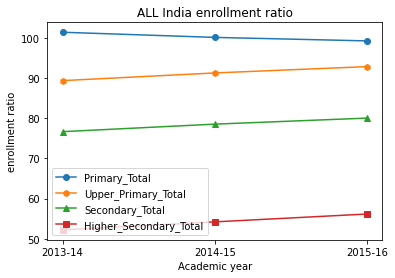

In [7]:
plt.rcParams.update({'font.size':10})
plt.plot(all_india['Year'],all_india['Primary_Total'],marker='o')
plt.plot(all_india['Year'],all_india['Upper_Primary_Total'],marker='h')
plt.plot(all_india['Year'],all_india['Secondary_Total'],marker='^')
plt.plot(all_india['Year'],all_india['Higher_Secondary_Total'],marker='s')
plt.xlabel('Academic year')
plt.ylabel('enrollment ratio')
plt.legend(('Primary_Total', 'Upper_Primary_Total', 'Secondary_Total','Higher_Secondary_Total'))
plt.title('ALL India enrollment ratio')

Text(0.5, 1.0, 'Enrollment ratio at different levels')

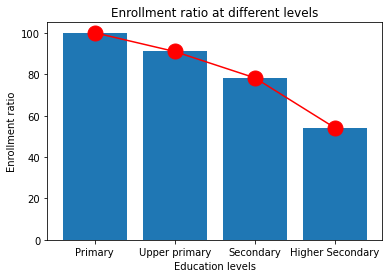

In [8]:
levels=['Primary', 'Upper primary','Secondary','Higher Secondary']
enrolls=[all_india['Primary_Total'].mean(),all_india['Upper_Primary_Total'].mean(),all_india['Secondary_Total'].mean(),all_india['Higher_Secondary_Total'].mean()]
plt.bar(levels,enrolls)
plt.plot(levels,enrolls,marker='o',markersize=15,color='red')
plt.xlabel('Education levels')
plt.ylabel('Enrollment ratio')
plt.title('Enrollment ratio at different levels')

## Enrollment ratio as the education level increases
The enrollment ratio at primary level is high, but it decreases with the education level increases. This may due to dropouts( students either fail or discontinue their studies) at each level of education.

In [9]:
enroll_data['total_enrollment_avg']=(enroll_data['Primary_Total']+enroll_data['Upper_Primary_Total']+enroll_data['Secondary_Total']+enroll_data['Higher_Secondary_Total'])/4
enroll_data.head()

,State_UT,Year,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total,total_enrollment_avg
0,Andaman & Nicobar Islands,2013-14,95.88,91.97,93.93,94.70,88.98,91.83,102.89,97.36,100.16,105.40,96.61,101.28,96.8000
20,Maharashtra,2013-14,99.93,99.68,99.81,96.93,96.76,96.69,87.50,83.39,85.58,58.87,58.66,58.77,85.2125
21,Manipur,2013-14,145.68,152.81,149.15,111.62,115.08,113.31,84.81,83.78,84.30,65.46,58.91,62.18,102.2350
22,Meghalaya,2013-14,132.89,137.89,135.35,102.24,119.99,110.97,67.09,78.61,72.80,19.56,26.41,22.94,85.5150
23,Mizoram,2013-14,127.88,123.89,125.96,119.38,118.03,118.72,105.92,107.34,106.62,57.97,61.85,59.88,102.7950


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 <a list of 38 Text major ticklabel objects>)

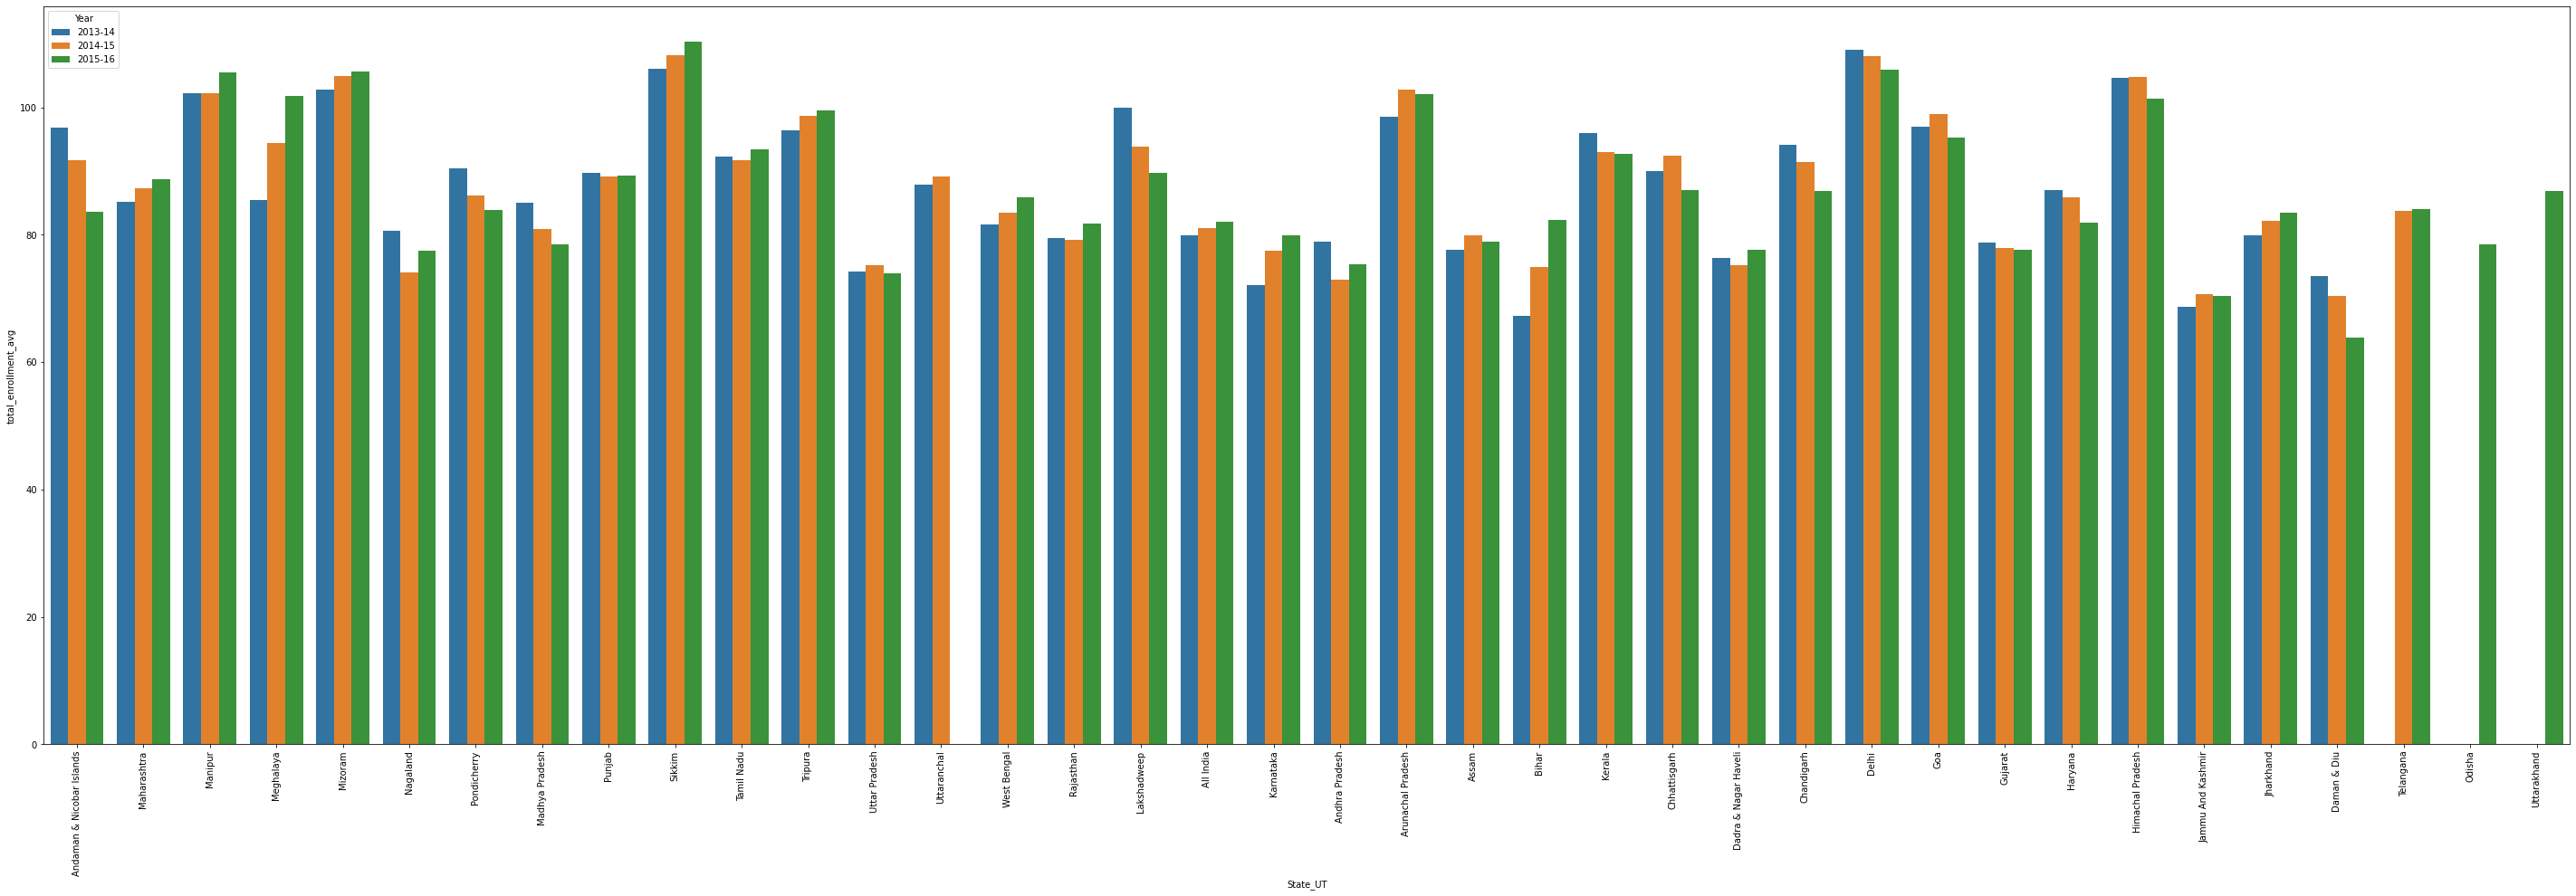

In [10]:
fig, ax = plt.subplots(figsize=(50, 15))
g=sns.barplot(x='State_UT',y='total_enrollment_avg',hue='Year',data=enroll_data,ax=ax)
plt.xticks(rotation=90)

### State with lowest enrollment ratio in year 2015-2016
Daman and Diu
### States having decreasing trend across the academic years
1. Andamaan and Nicobar
2. Lakshawdeep
3. Andra Pradesh
4. Kerala
5. Chandigarh
6. Delhi
7. Haryana
8. Daman and Diu
9. Himachal Pradesh

### State with increasing trend and highest enrollment ratio
Sikkim

Text(0.5, 1.0, 'Higher_Secondary_Girls')

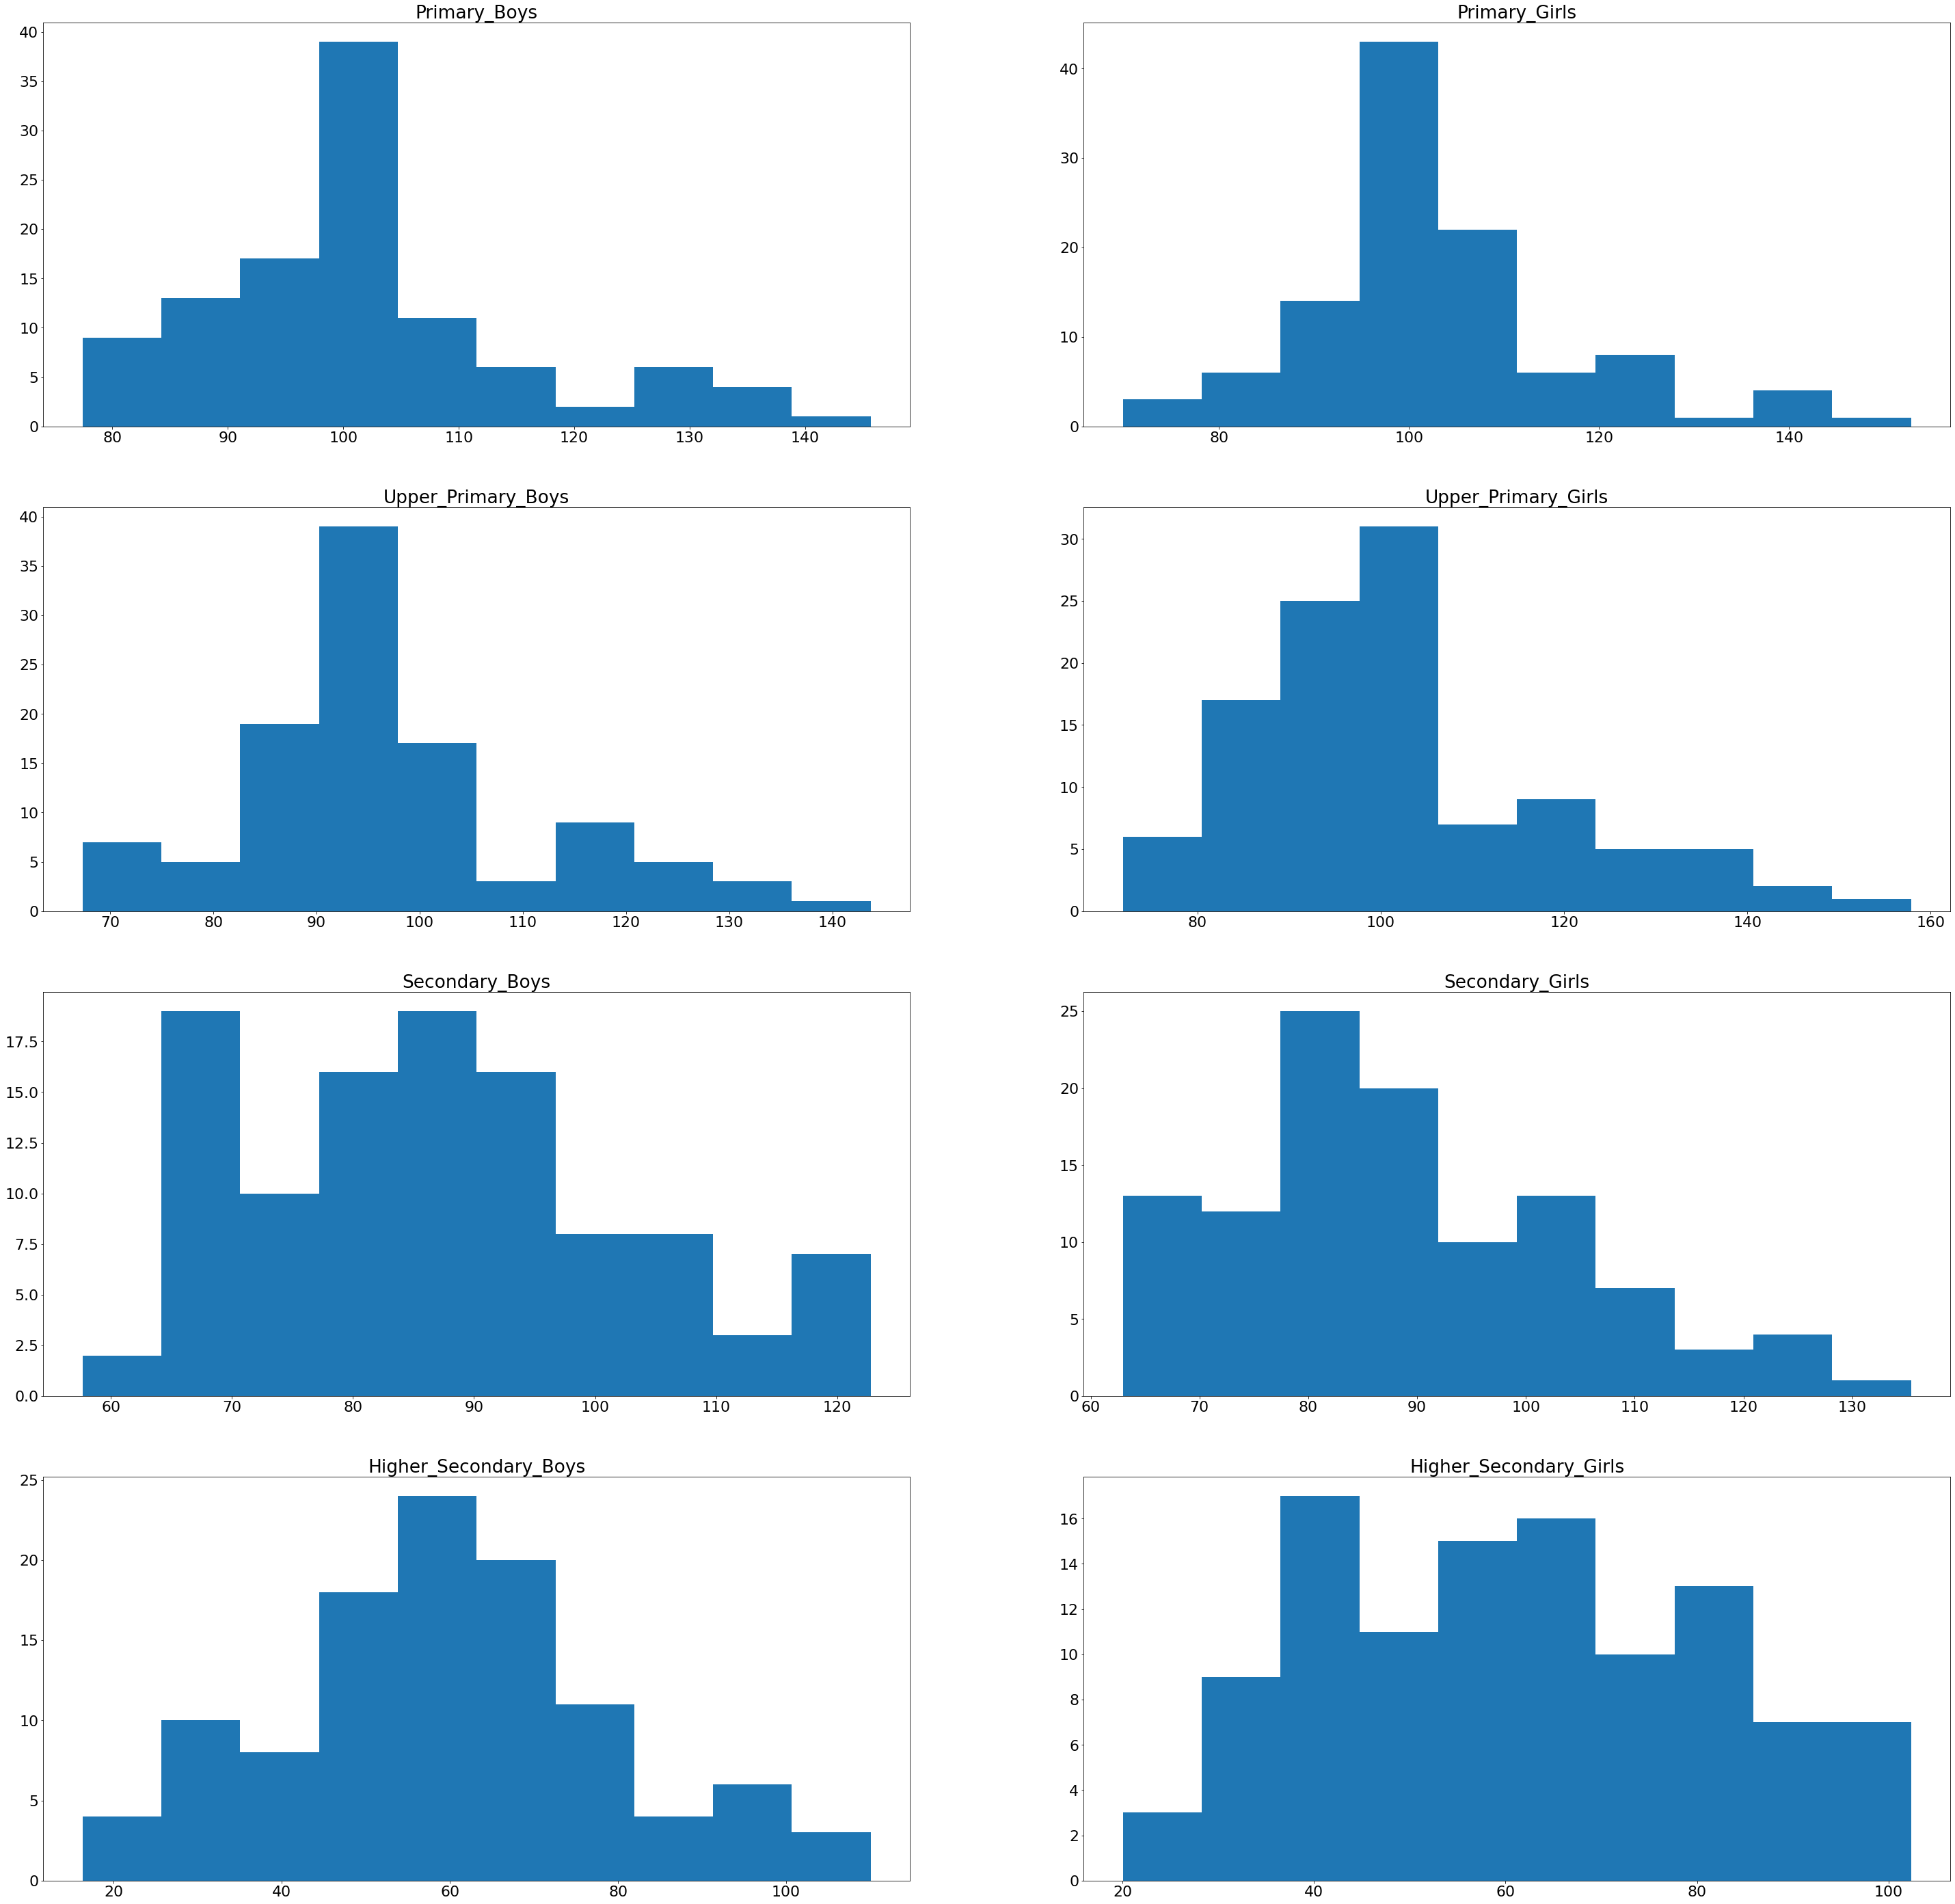

In [11]:
plt.rcParams.update({'font.size': 22})
figure,axis=plt.subplots(4,2,figsize=(50,50))
axis[0,0].hist(enroll_data['Primary_Boys'])
axis[0,0].set_title('Primary_Boys')
axis[0,1].hist(enroll_data['Primary_Girls'])
axis[0,1].set_title('Primary_Girls')
axis[1,0].hist(enroll_data['Upper_Primary_Boys'])
axis[1,0].set_title('Upper_Primary_Boys')
axis[1,1].hist(enroll_data['Upper_Primary_Girls'])
axis[1,1].set_title('Upper_Primary_Girls')
axis[2,0].hist(enroll_data['Secondary_Boys'])
axis[2,0].set_title('Secondary_Boys')
axis[2,1].hist(enroll_data['Secondary_Girls'])
axis[2,1].set_title('Secondary_Girls')
axis[3,0].hist(enroll_data['Higher_Secondary_Boys'])
axis[3,0].set_title('Higher_Secondary_Boys')
axis[3,1].hist(enroll_data['Higher_Secondary_Girls'])
axis[3,1].set_title('Higher_Secondary_Girls')

In [11]:
enroll_data.describe()

,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.00000,108.000000
mean,101.924352,103.094907,102.446296,97.036111,101.695833,99.298519,87.093981,88.712778,87.870278,59.371019,61.28000,60.158148
std,13.948102,14.267329,14.001276,15.064419,16.724645,15.765924,15.410966,15.643175,15.117491,19.825618,19.88565,19.450279
min,77.420000,69.900000,73.800000,67.320000,71.850000,70.200000,57.660000,62.960000,60.080000,16.320000,20.03000,18.390000
25%,95.172500,95.927500,95.082500,88.692500,91.375000,90.882500,74.847500,78.857500,75.922500,46.900000,43.82750,44.887500
50%,100.185000,101.285000,101.025000,94.620000,98.920000,96.125000,85.715000,85.295000,85.965000,60.540000,60.37000,60.020000
75%,107.347500,108.127500,107.742500,100.787500,106.705000,102.820000,95.862500,99.770000,98.085000,70.175000,77.13000,73.780000
max,145.680000,152.810000,149.150000,143.720000,157.850000,150.610000,122.770000,135.390000,127.610000,110.060000,102.35000,101.280000


### Comparison of enrollment ratio of boys and girls
1. The average enrollment ratio is more or less similar provided the enrollment ratio for both categories decreases with the increase in education level
2. The distribution is also quite similar

## State-wise Data

In [12]:
state_data=enroll_data.groupby('State_UT').mean()
state_data.sort_values(by='total_enrollment_avg',ascending=False)

,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total,total_enrollment_avg
State_UT,,,,,,,,,,,,,
Sikkim,117.456667,108.983333,113.286667,136.880000,140.166667,143.370000,102.613333,117.100000,109.803333,58.713333,74.380000,66.466667,108.231667
Delhi,108.733333,113.830000,111.043333,118.233333,134.890000,125.423333,102.273333,106.720000,104.256667,87.213333,93.376667,89.983333,107.676667
Mizoram,125.863333,121.776667,123.870000,127.636667,125.866667,126.776667,106.800000,109.103333,107.930000,57.826667,60.663333,59.223333,104.450000
Himachal Pradesh,98.763333,100.480000,99.573333,102.396667,103.850000,103.080000,116.750000,111.783333,114.420000,97.473333,97.340000,97.413333,103.621667
Manipur,135.686667,140.696667,138.123333,118.003333,123.450000,120.656667,89.950000,88.693333,89.330000,68.303333,62.056667,65.173333,103.320833
Arunachal Pradesh,128.503333,127.033333,127.783333,119.963333,124.493333,122.200000,91.046667,87.523333,89.300000,65.060000,65.473333,65.263333,101.136667
Tripura,109.926667,110.933333,110.416667,119.250000,122.536667,120.846667,117.706667,119.713333,118.690000,45.503333,39.476667,42.616667,98.142500
Goa,102.963333,104.926667,103.893333,100.783333,102.450000,101.563333,110.786667,105.236667,108.150000,70.930000,78.840000,74.653333,97.065000
Lakshadweep,80.026667,73.956667,76.946667,96.420000,84.850000,90.103333,114.293333,121.780000,118.093333,98.276667,88.136667,92.936667,94.520000


In [134]:
state_data.sort_values(by='Higher_Secondary_Total').head(10)

,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total,total_enrollment_avg
State_UT,,,,,,,,,,,,,
Bihar,99.156667,105.600000,102.240000,89.550000,107.336667,97.733333,65.053333,74.080000,69.180000,30.000000,30.830000,30.370000,74.880833
Karnataka,102.000000,101.870000,101.933333,92.226667,93.396667,92.786667,80.100000,81.656667,80.836667,28.273333,32.740000,30.403333,76.490000
Meghalaya,135.943333,140.566667,138.216667,113.840000,132.433333,122.963333,74.313333,86.550000,80.373333,30.426667,37.883333,34.106667,93.915000
Nagaland,104.706667,107.973333,106.283333,97.303333,104.810000,100.876667,65.853333,70.593333,68.130000,34.733333,33.933333,34.340000,77.407500
Daman & Diu,83.803333,87.366667,85.396667,79.733333,87.786667,83.280000,67.893333,82.416667,73.900000,26.380000,50.930000,34.460000,69.259167
Assam,109.953333,113.116667,111.500000,88.533333,99.793333,94.013333,69.146667,80.270000,74.526667,34.236667,36.380000,35.240000,78.820000
Odisha,104.910000,102.500000,103.730000,94.860000,93.630000,94.260000,79.400000,79.830000,79.610000,36.990000,36.070000,36.540000,78.535000
Dadra & Nagar Haveli,86.533333,80.293333,83.496667,97.220000,89.253333,93.363333,90.163333,82.966667,86.766667,39.543333,44.993333,41.943333,76.392500
Tripura,109.926667,110.933333,110.416667,119.250000,122.536667,120.846667,117.706667,119.713333,118.690000,45.503333,39.476667,42.616667,98.142500


In [135]:
state_data.sort_values(by='Secondary_Total').head(10)

,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total,total_enrollment_avg
State_UT,,,,,,,,,,,,,
Jammu And Kashmir,84.650000,86.706667,85.616667,70.076667,72.430000,71.173333,67.710000,64.860000,66.356667,59.263333,53.326667,56.420000,69.891667
Uttar Pradesh,91.170000,98.323333,94.520000,67.900000,81.960000,74.263333,67.340000,67.126667,67.240000,63.370000,60.393333,61.933333,74.489167
Nagaland,104.706667,107.973333,106.283333,97.303333,104.810000,100.876667,65.853333,70.593333,68.130000,34.733333,33.933333,34.340000,77.407500
Bihar,99.156667,105.600000,102.240000,89.550000,107.336667,97.733333,65.053333,74.080000,69.180000,30.000000,30.830000,30.370000,74.880833
Jharkhand,108.633333,109.973333,109.283333,95.086667,103.926667,99.316667,69.573333,74.453333,71.883333,46.676667,47.353333,46.990000,81.868333
Daman & Diu,83.803333,87.366667,85.396667,79.733333,87.786667,83.280000,67.893333,82.416667,73.900000,26.380000,50.930000,34.460000,69.259167
Gujarat,97.843333,100.413333,99.030000,93.383333,93.393333,93.383333,80.960000,66.473333,74.323333,48.556667,42.230000,45.623333,78.090000
Andhra Pradesh,89.936667,89.676667,89.810000,81.090000,81.850000,81.456667,73.283333,75.556667,74.370000,56.460000,58.376667,57.363333,75.750000
Assam,109.953333,113.116667,111.500000,88.533333,99.793333,94.013333,69.146667,80.270000,74.526667,34.236667,36.380000,35.240000,78.820000


In [136]:
state_data.sort_values(by='Upper_Primary_Total').head(10)

,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total,total_enrollment_avg
State_UT,,,,,,,,,,,,,
Jammu And Kashmir,84.650000,86.706667,85.616667,70.076667,72.430000,71.173333,67.710000,64.860000,66.356667,59.263333,53.326667,56.420000,69.891667
Uttar Pradesh,91.170000,98.323333,94.520000,67.900000,81.960000,74.263333,67.340000,67.126667,67.240000,63.370000,60.393333,61.933333,74.489167
Andhra Pradesh,89.936667,89.676667,89.810000,81.090000,81.850000,81.456667,73.283333,75.556667,74.370000,56.460000,58.376667,57.363333,75.750000
Daman & Diu,83.803333,87.366667,85.396667,79.733333,87.786667,83.280000,67.893333,82.416667,73.900000,26.380000,50.930000,34.460000,69.259167
Uttaranchal,100.045000,101.160000,100.570000,84.715000,87.265000,86.025000,90.125000,88.330000,89.265000,78.055000,78.645000,78.335000,88.548750
Uttarakhand,98.870000,99.760000,99.290000,85.840000,88.070000,86.890000,85.710000,85.730000,85.720000,73.360000,78.540000,75.830000,86.932500
Rajasthan,101.146667,99.130000,100.200000,88.573333,85.666667,87.236667,83.050000,69.920000,76.966667,63.470000,48.040000,56.266667,80.167500
Andaman & Nicobar Islands,93.306667,89.223333,91.260000,90.540000,85.220000,87.863333,95.850000,90.590000,93.243333,92.323333,88.506667,90.516667,90.720833
Lakshadweep,80.026667,73.956667,76.946667,96.420000,84.850000,90.103333,114.293333,121.780000,118.093333,98.276667,88.136667,92.936667,94.520000


In [137]:
state_data.sort_values(by='Primary_Total').head(10)

,Primary_Boys,Primary_Girls,Primary_Total,Upper_Primary_Boys,Upper_Primary_Girls,Upper_Primary_Total,Secondary_Boys,Secondary_Girls,Secondary_Total,Higher_Secondary_Boys,Higher_Secondary_Girls,Higher_Secondary_Total,total_enrollment_avg
State_UT,,,,,,,,,,,,,
Lakshadweep,80.026667,73.956667,76.946667,96.420000,84.850000,90.103333,114.293333,121.780000,118.093333,98.276667,88.136667,92.936667,94.520000
Dadra & Nagar Haveli,86.533333,80.293333,83.496667,97.220000,89.253333,93.363333,90.163333,82.966667,86.766667,39.543333,44.993333,41.943333,76.392500
Daman & Diu,83.803333,87.366667,85.396667,79.733333,87.786667,83.280000,67.893333,82.416667,73.900000,26.380000,50.930000,34.460000,69.259167
Jammu And Kashmir,84.650000,86.706667,85.616667,70.076667,72.430000,71.173333,67.710000,64.860000,66.356667,59.263333,53.326667,56.420000,69.891667
Chandigarh,83.153333,91.383333,86.800000,95.010000,102.856667,98.376667,88.786667,90.843333,89.663333,87.136667,90.310000,88.446667,90.821667
Pondicherry,84.740000,92.670000,88.413333,87.220000,94.906667,90.766667,90.563333,100.650000,95.206667,63.380000,84.426667,73.056667,86.860833
Andhra Pradesh,89.936667,89.676667,89.810000,81.090000,81.850000,81.456667,73.283333,75.556667,74.370000,56.460000,58.376667,57.363333,75.750000
Andaman & Nicobar Islands,93.306667,89.223333,91.260000,90.540000,85.220000,87.863333,95.850000,90.590000,93.243333,92.323333,88.506667,90.516667,90.720833
Uttar Pradesh,91.170000,98.323333,94.520000,67.900000,81.960000,74.263333,67.340000,67.126667,67.240000,63.370000,60.393333,61.933333,74.489167


### From the above analysis,Daman and Diu,Jammu and Kashmir,Bihar, Uttar Pradesh have decreasing and least enrollment ratio

In [13]:
electricity=pd.read_csv(r'D:\Machine learning for data analysis\EDA Dataset\Indian school statstics\percentage-of-schools-with-electricity-2013-2016.csv')
electricity.State_UT.unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'All India'], dtype=object)

# Electricity and Computer in Indian Schools

In [14]:
all_electricity=electricity.loc[electricity['State_UT']=='All India'].mean()


In [15]:
computers=pd.read_csv(r'D:\Machine learning for data analysis\EDA Dataset\Indian school statstics\percentage-of-schools-with-comps-2013-2016.csv')
computers.State_UT.unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand',
       'Karnataka', 'Kerala', 'Lakshadweep', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'All India'], dtype=object)

In [16]:
all_computers=computers.loc[computers['State_UT']=='All India'].mean()


Text(0.5, 1.0, 'Electricity and computers in schools (All India)')

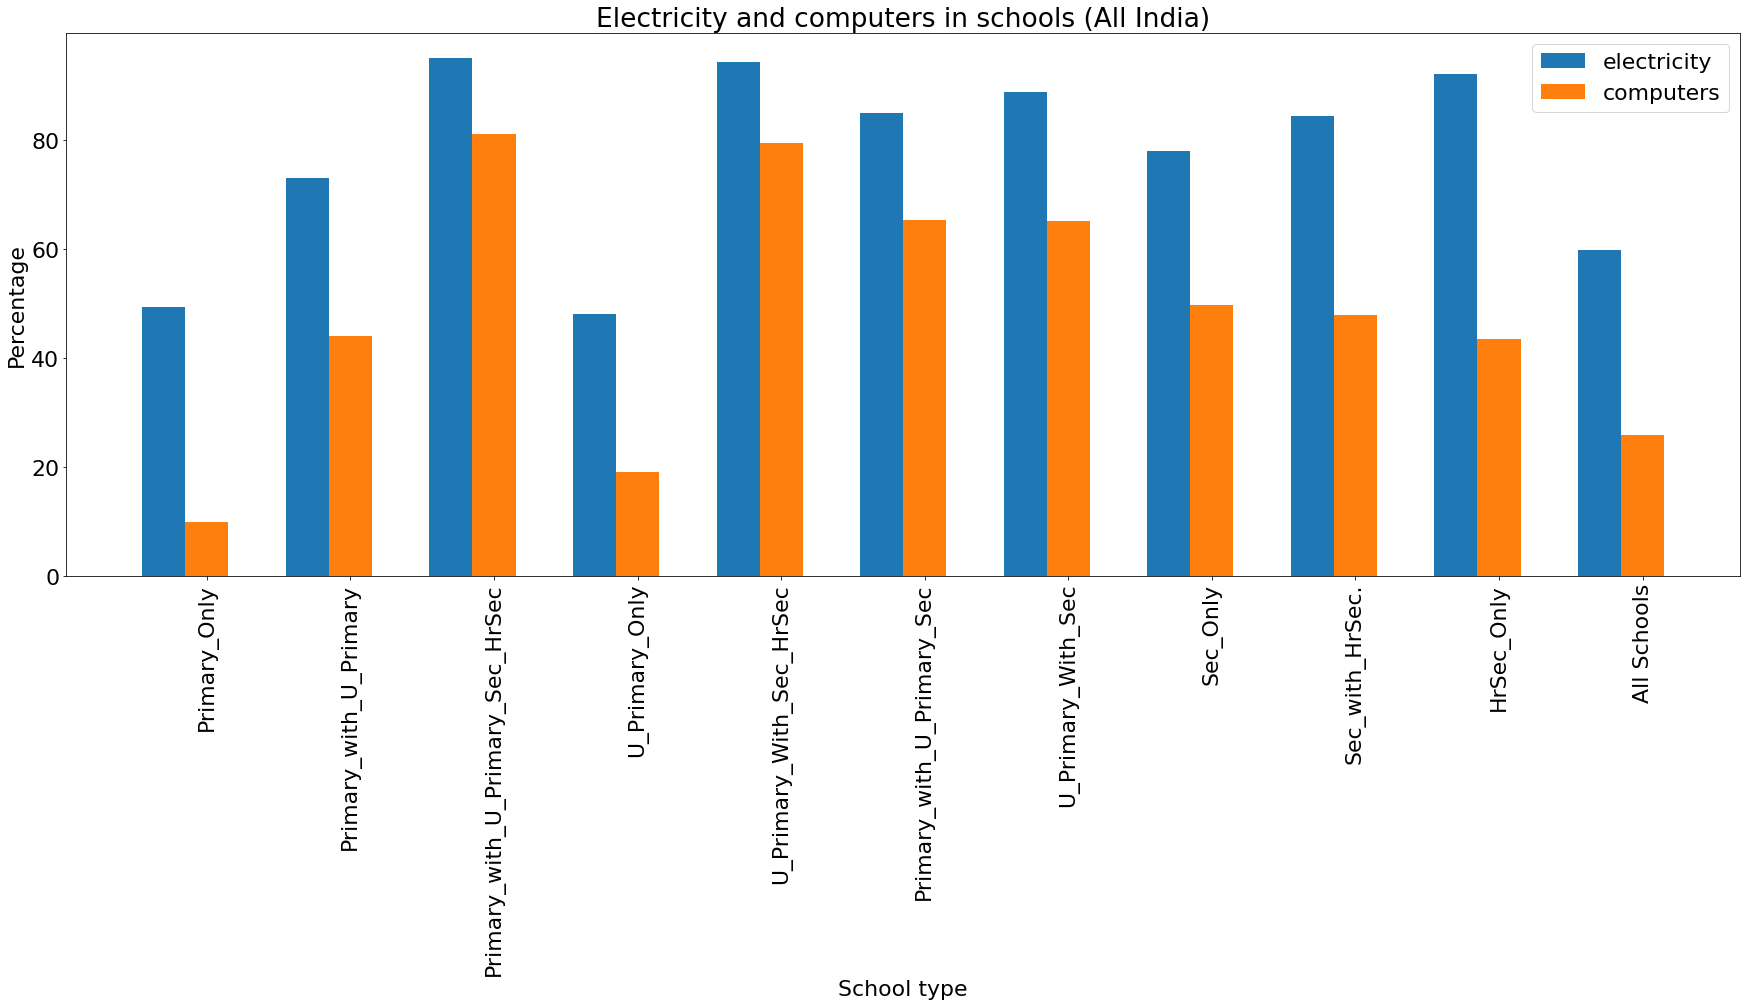

In [21]:
x=electricity.columns[2:]
X=np.arange(len(x))
f,ax=plt.subplots(figsize=(30,10))
plt.bar(X-0.3,all_electricity,0.3)
plt.bar(X,all_computers,0.3,)
plt.xticks(X,x,rotation=90)
plt.legend(['electricity','computers'])
plt.xlabel('School type')
plt.ylabel('Percentage')
plt.title('Electricity and computers in schools (All India)')

# Comparing electricity and computer accessibilty in cities with high and less enrollment ratio
### 4 cities with high enrollment ratio
1. Sikkim
2. Delhi
3. Mizoram
4. Manipur

### 4 cities with less enrollment ratio
1. Daman And Diu
2. Jammu and Kashmir
3. Uttar pradesh
4. Bihar

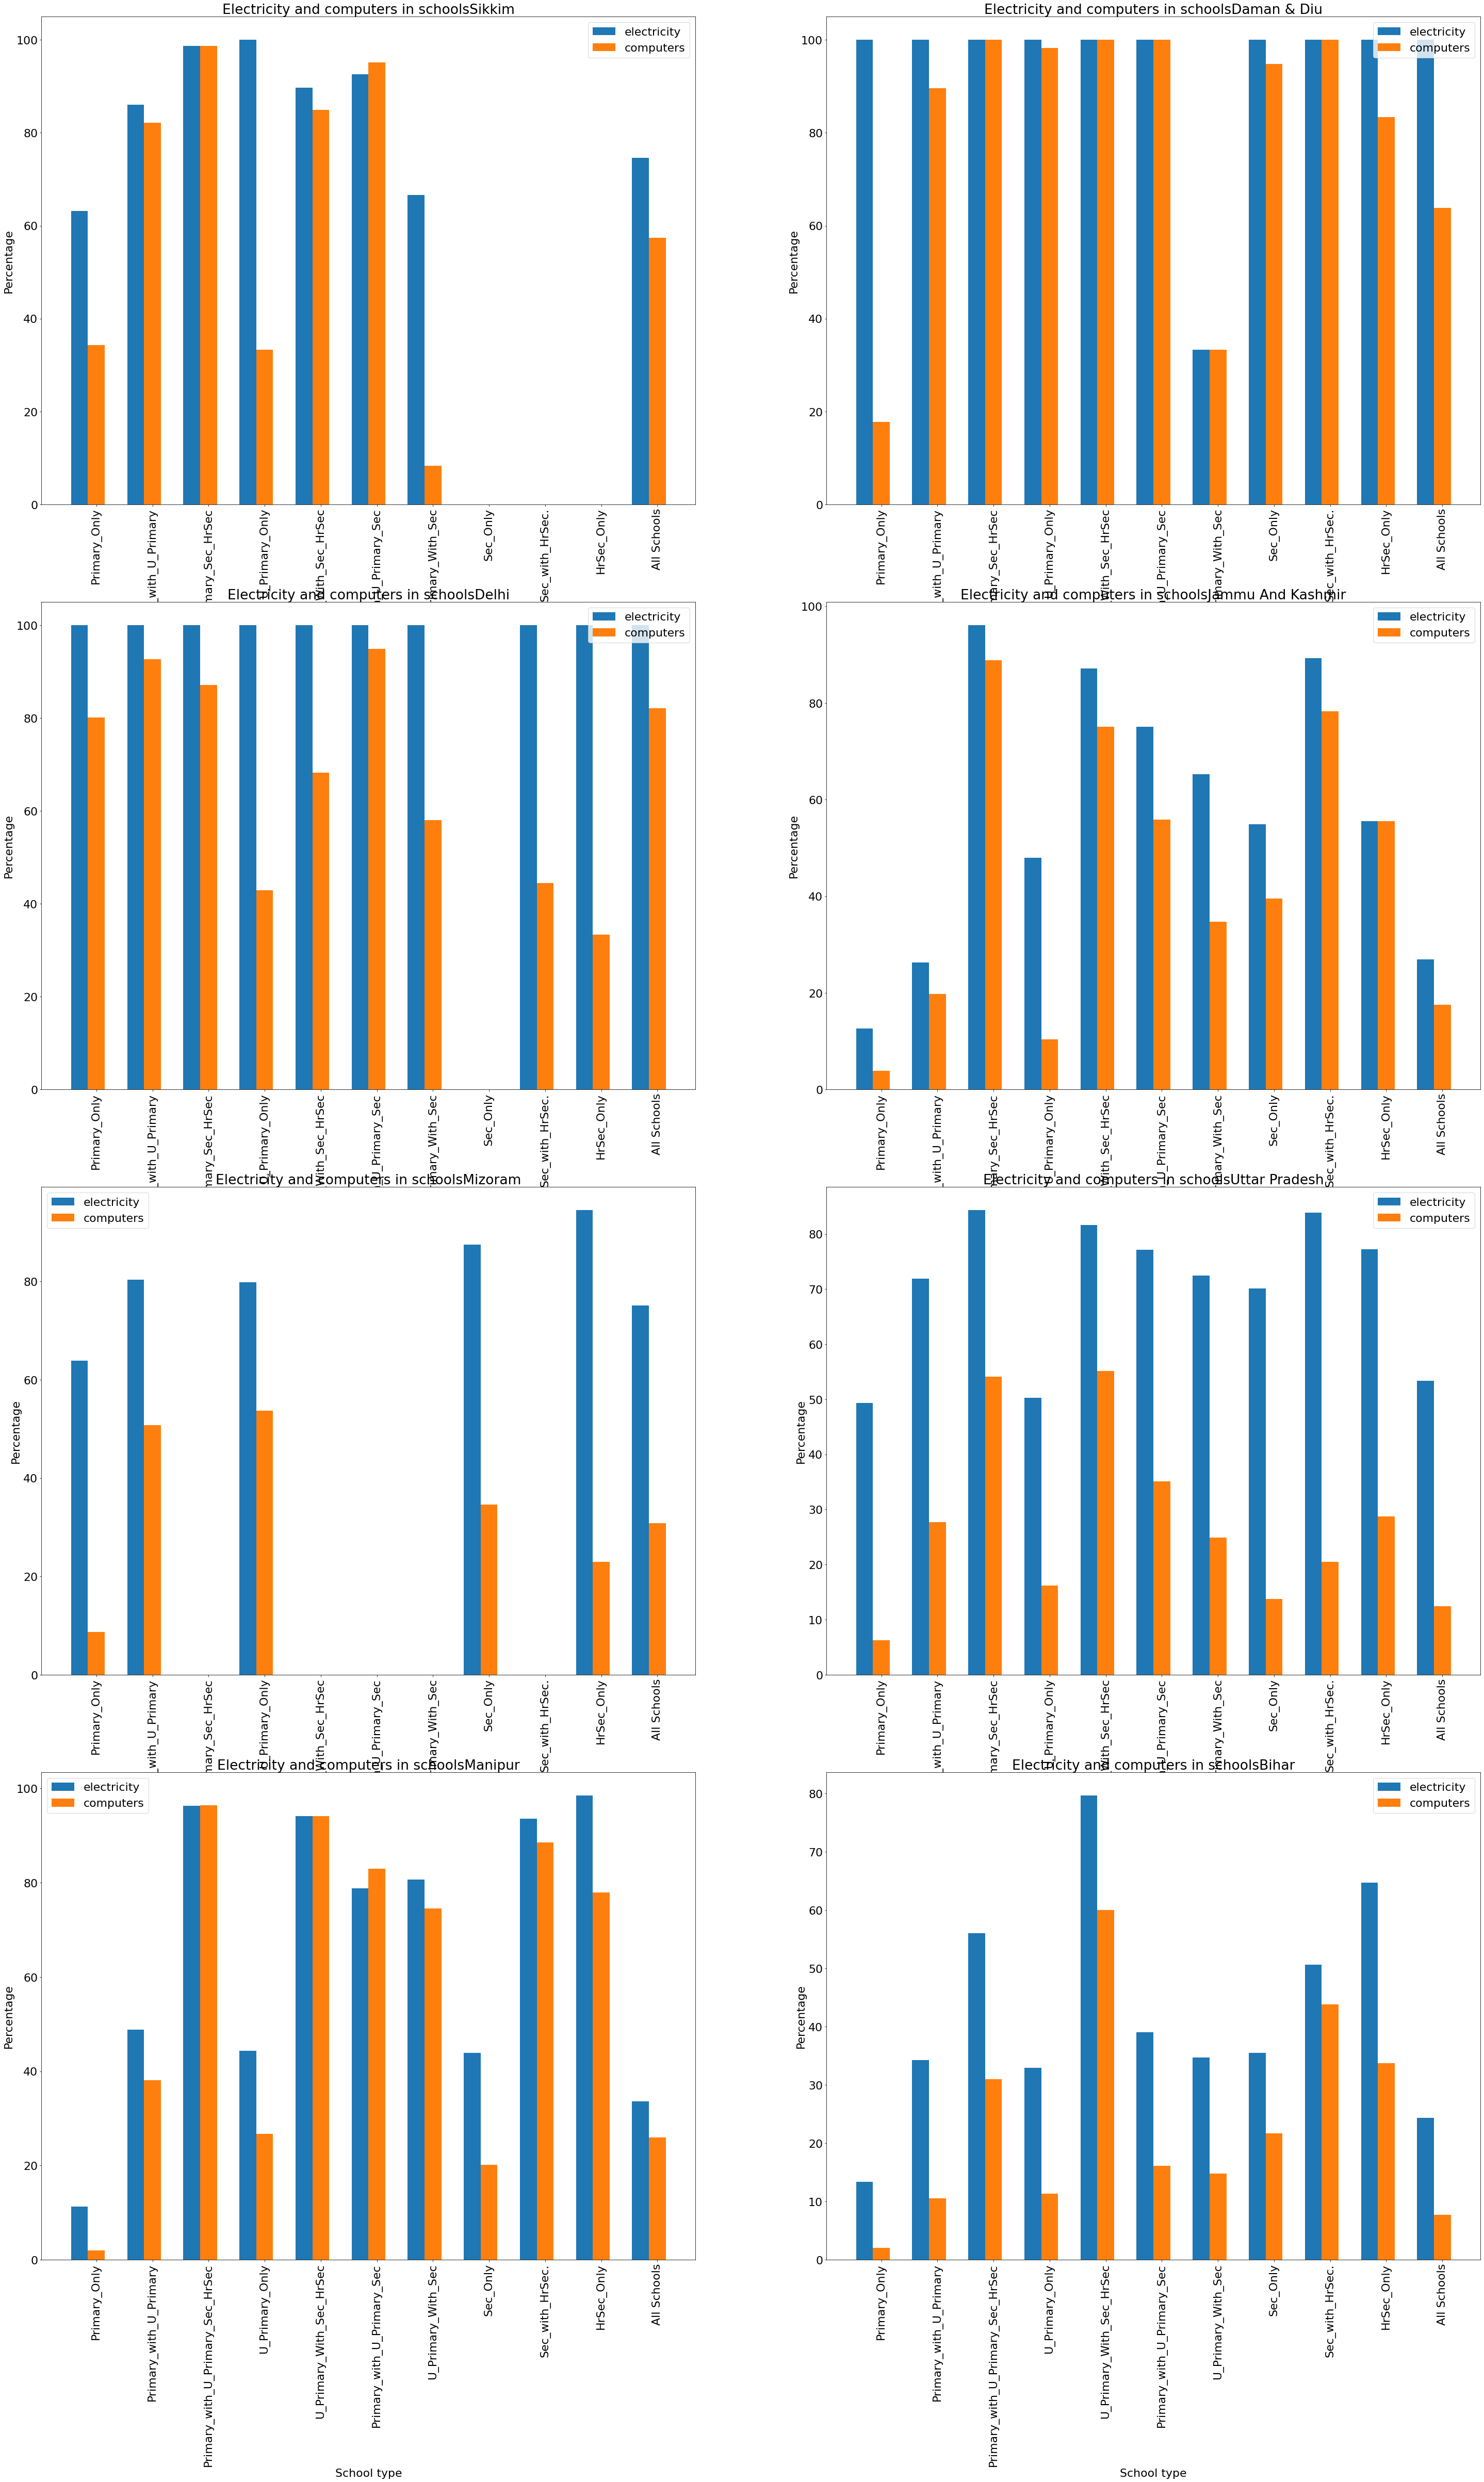

In [22]:
X=np.arange(len(x))
f,ax=plt.subplots(4,2,figsize=(50,80))
top=['Sikkim','Delhi','Mizoram','Manipur']
least=['Daman & Diu','Jammu And Kashmir','Uttar Pradesh','Bihar']
for i in range(0,4):
    ax[i,0].bar(X-0.3,electricity.loc[electricity['State_UT']==top[i]].mean(),0.3)
    ax[i,0].bar(X,computers.loc[computers['State_UT']==top[i] ].mean(),0.3)
    ax[i,0].set_xticks(X)
    ax[i,0].set_xticklabels(x,rotation=90)
    ax[i,0].legend(['electricity','computers'])
    ax[i,0].set_xlabel('School type')
    ax[i,0].set_ylabel('Percentage')
    ax[i,0].set_title('Electricity and computers in schools'+top[i])
    ax[i,1].bar(X-0.3,electricity.loc[electricity['State_UT']==least[i]].mean(),0.3)
    ax[i,1].bar(X,computers.loc[computers['State_UT']==least[i]].mean(),0.3)
    ax[i,1].set_xticks(X)
    ax[i,1].set_xticklabels(x,rotation=90)
    ax[i,1].legend(['electricity','computers'])
    ax[i,1].set_xlabel('School type')
    ax[i,1].set_ylabel('Percentage')
    ax[i,1].set_title('Electricity and computers in schools'+ least[i])

## State-wise Data on electricity and Computers

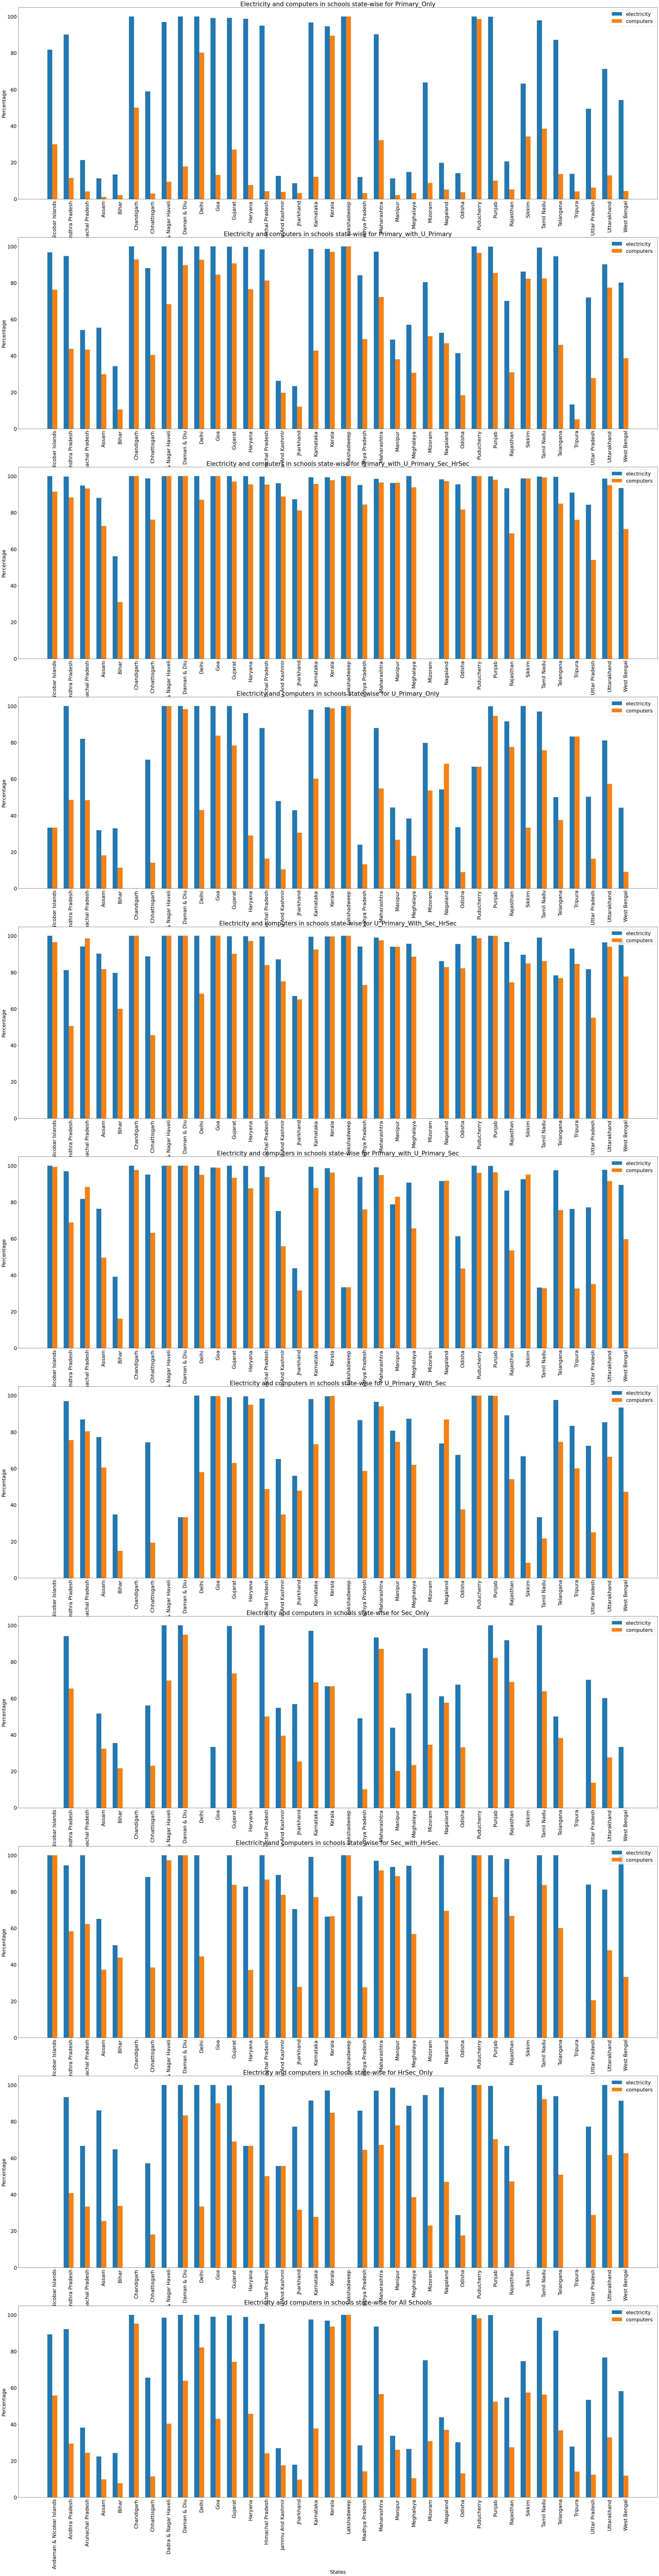

In [35]:
use=electricity.columns[2:]
f,a=plt.subplots(len(use),figsize=(50,200))
for i in range(len(use)):
    state_elec1=electricity.groupby('State_UT')[[use[i]]].mean().iloc[1:,:]
    state_comp1=computers.groupby('State_UT')[[use[i]]].mean().iloc[1:,:]
    a[i].bar(X1-0.3,state_elec1[use[i]],0.3)
    a[i].bar(X1,state_comp1[use[i]],0.3)
    a[i].set_xticks(X1)
    a[i].set_xticklabels(states,rotation=90)
    a[i].legend(['electricity','computers'])
    a[i].set_xlabel('States')
    a[i].set_ylabel('Percentage')
    a[i].set_title('Electricity and computers in schools state-wise for '+use[i])

## Inference - Electricity and computers in India 
1. In all states,percentage of Schools which provides education from primary to Higher Secondary and primary to secondary having electricity and computers is high.
2. Percentage of Schools with specific education levels of having computers and electricity is low
3. Percentage of schools in Assam and Bihar of having computers is low in most cases


# Water facilities in Schools

In [36]:
water=pd.read_csv(r'D:\Machine learning for data analysis\EDA Dataset\Indian school statstics\percentage-of-schools-with-water-facility-2013-2016.csv')
water.head()

,State/UT,Year,Primary_Only,Primary_with_U_Primary,Primary_with_U_Primary_Sec_HrSec,U_Primary_Only,U_Primary_With_Sec_HrSec,Primary_with_U_Primary_Sec,U_Primary_With_Sec,Sec_Only,Sec_with_HrSec.,HrSec_Only,All Schools
0,Andaman & Nicobar Islands,2013-14,98.17,98.68,100.00,0.00,100.00,100.00,0.00,0.0,100.0,0.00,98.69
1,Andaman & Nicobar Islands,2014-15,99.55,98.77,100.00,100.00,100.00,100.00,0.00,0.0,100.0,0.00,99.52
2,Andaman & Nicobar Islands,2015-16,100.00,100.00,100.00,0.00,100.00,100.00,0.00,0.0,100.0,0.00,100.00
3,Andhra Pradesh,2013-14,86.89,94.53,99.66,90.91,87.26,98.84,96.02,97.5,100.0,97.52,90.35
4,Andhra Pradesh,2014-15,91.85,96.07,100.00,100.00,90.00,99.56,97.48,100.0,100.0,98.37,93.74


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36]),
 <a list of 37 Text major ticklabel objects>)

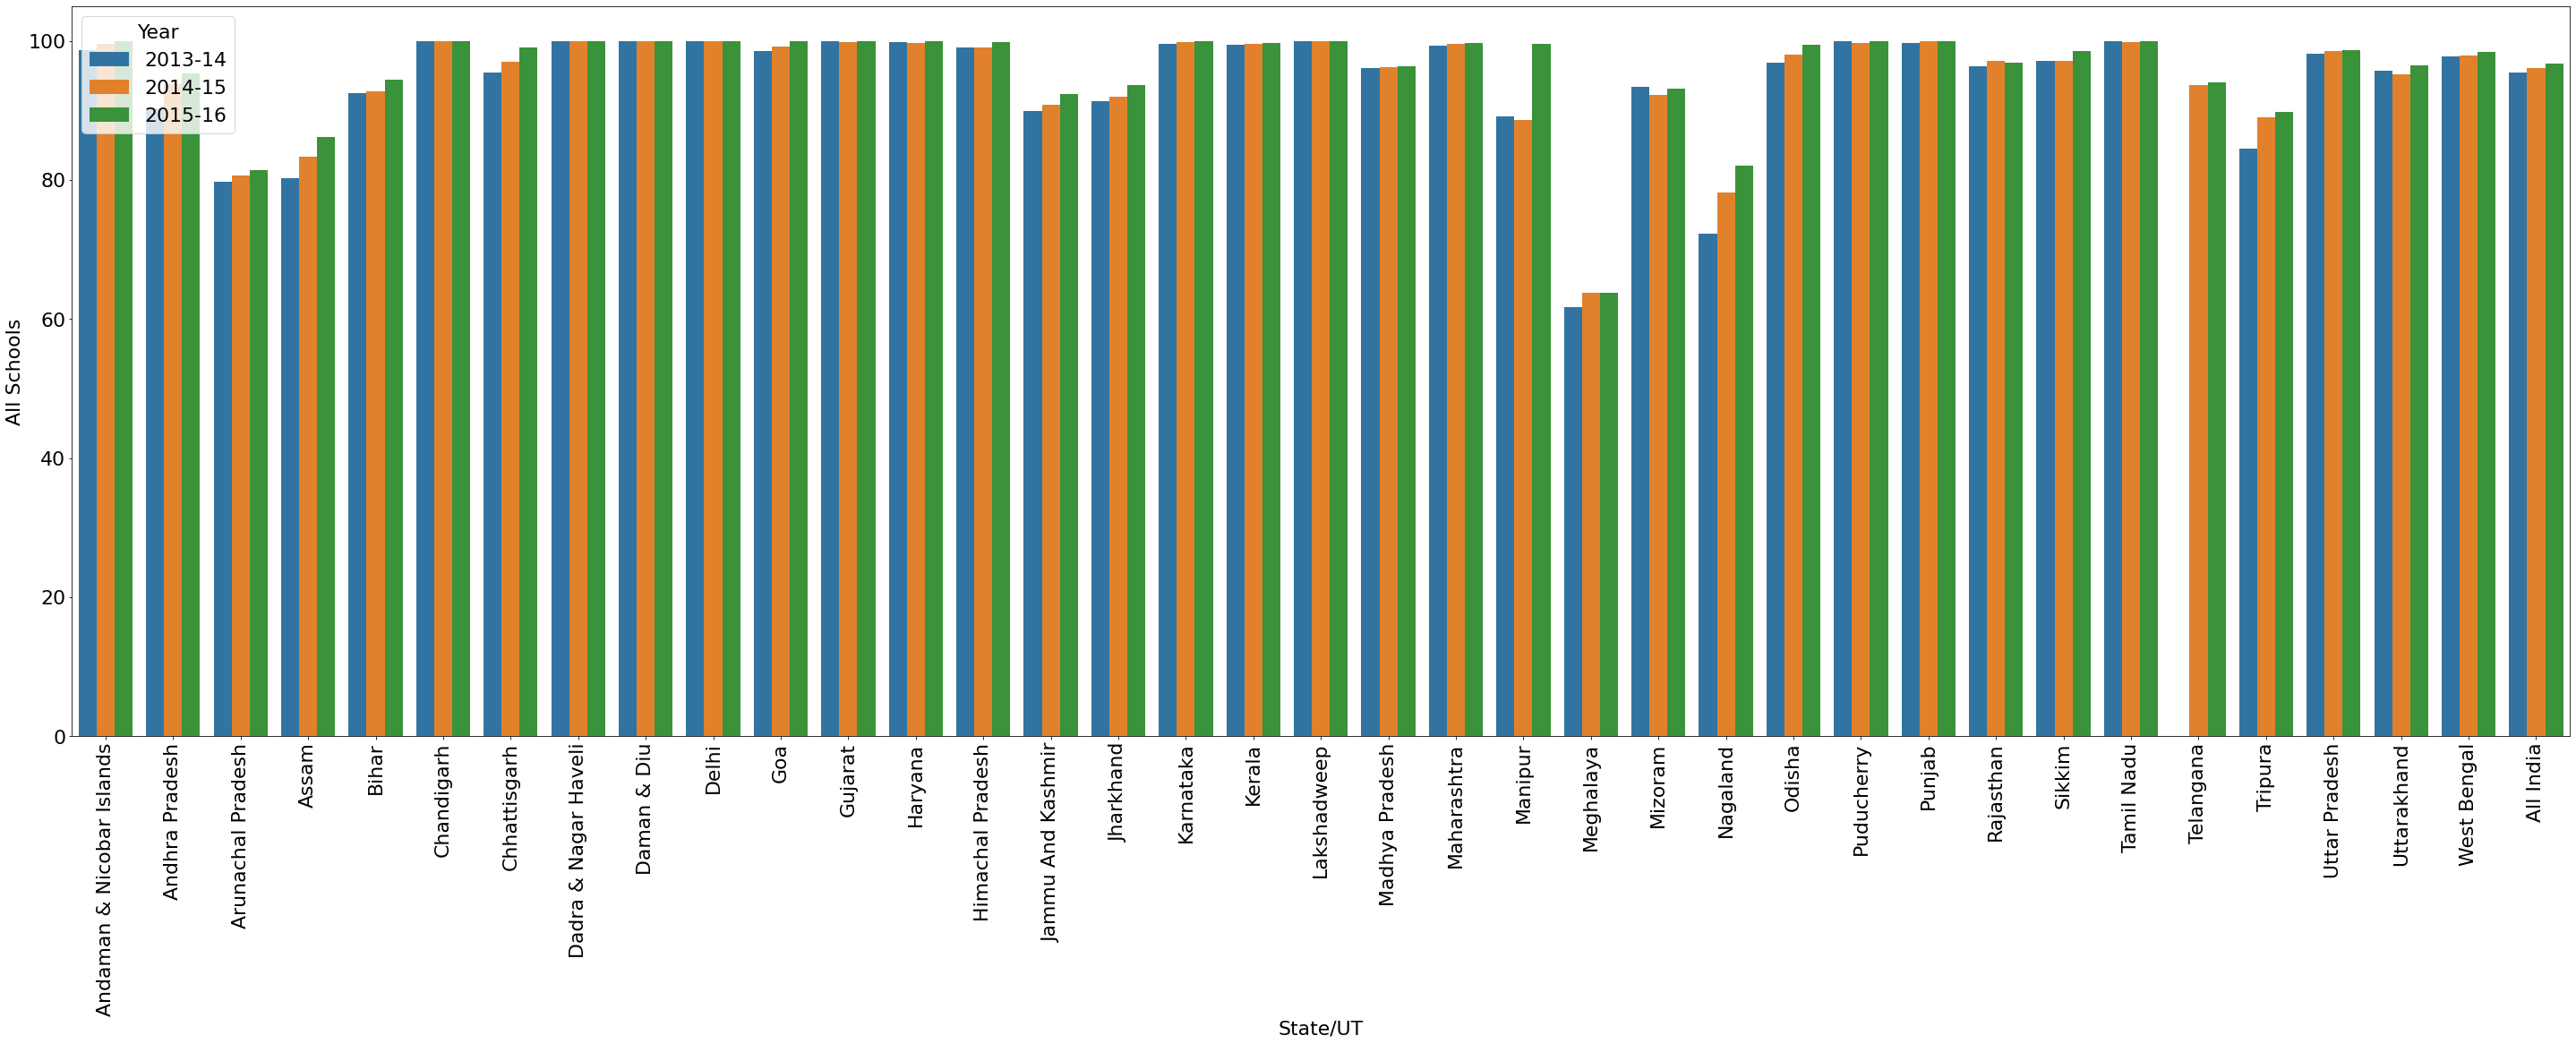

In [38]:
f,ax=plt.subplots(figsize=(50,15))
sns.barplot(x='State/UT',y='All Schools',hue='Year',data=water,ax=ax)
plt.xticks(rotation=90)

From the above graph, percentage of schools having water facilities in all states except *Meghalaya* is more than 80%